## Information Extraction from Unstructured Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [28]:
# Create unstructured dataset
texts = [
    "Patient has a history of hypertension and diabetes . Prescribed medication X .",
    "Asthma diagnosis confirmed . Patient advised to use inhaler daily .",
    "Hypertension patient . Needs regular monitoring of blood pressure .",
    "Diabetes patient . Recommended diet and exercise .",
    "Patient diagnosed with hypertension . Medication Y prescribed ."
]

In [30]:
df = pd.DataFrame({"Medical_Texts": texts})
df.head()

,Medical_Texts
0,Patient has a history of hypertension and diab...
1,Asthma diagnosis confirmed . Patient advised t...
2,Hypertension patient . Needs regular monitorin...
3,Diabetes patient . Recommended diet and exerci...
4,Patient diagnosed with hypertension . Medicati...


In [29]:
# Text preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"\W+", " ", text)
    text_list = [words for words in text.split() 
                 if words not in stopwords.words("english") 
                 and words not in string.punctuation]
    return " ".join(text_list)

In [31]:
df['Medical_Texts'] = df['Medical_Texts'].apply(preprocess)
df.head()

,Medical_Texts
0,patient history hypertension diabetes prescrib...
1,asthma diagnosis confirmed patient advised use...
2,hypertension patient needs regular monitoring ...
3,diabetes patient recommended diet exercise
4,patient diagnosed hypertension medication pres...


In [32]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10)
x_tfidf = vectorizer.fit_transform(df['Medical_Texts']).toarray()

x_tfidf[:5]

array([[0.        , 0.49764935, 0.41309391, 0.49764935, 0.        ,
        0.        , 0.29391972, 0.49764935, 0.        , 0.        ],
       [0.90275015, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43016528, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.3493216 , 0.        , 0.52160001,
        0.52160001, 0.2485452 , 0.        , 0.52160001, 0.        ],
       [0.        , 0.58873218, 0.        , 0.        , 0.        ,
        0.        , 0.34771471, 0.        , 0.        , 0.72971837],
       [0.        , 0.        , 0.47625576, 0.57373967, 0.        ,
        0.        , 0.33885989, 0.57373967, 0.        , 0.        ]])

In [33]:
# KMeans Clustering
kmeans = KMeans(n_clusters=2)
predictions = kmeans.fit_predict(x_tfidf)

predictions[:5]

array([1, 1, 0, 1, 1])

(-0.5, 799.5, 399.5, -0.5)

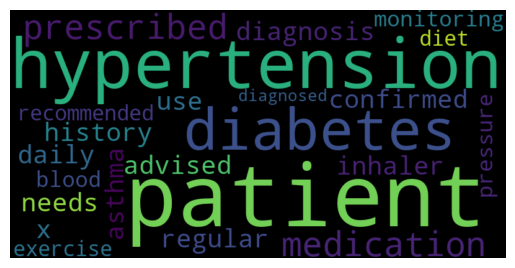

In [34]:
# Generate and visualize WordCloud
all_texts = " ".join(df['Medical_Texts'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')